# Lotka-Volterra predator-prey model

$$
\frac{dx}{dt} = x(\alpha - \beta y) \\
\frac{dy}{dt} = y(\delta x - \gamma)
$$

Intuition behind this is as follows:
* Prey (x) grows exponentially
* Prey population is reduced by consumption due to predators
* Predator population (y) growth dependent on available prey
* Predator population dies at a constant rate
* All changes are proportional to population size (good model for e.g. mitosis)

Critical assumptions:
* Prey has infinite food supply (carrying capacity of ecosystem is infinite)
* Predators have infinite appetite and consume the prey exclusively
* No genetic changes

# Differential equations explained

There are many reasons to use differential equations in models, in both physical and biological sciences. Here are three of the simplest and most important:

1. Sometimes the dynamics of a process are sufficient to give us useful information, i.e. we might care about where a system is stable, or how quickly a quantity is dissipated or grows. We can get many of these properties instantly from inspection of the parameters in  a differential equation.

2. It's harder to integrate than to differentiate. Sometimes an equation can be constructed from an understanding of the phenomenon, but a closed form integral solution can be difficult or impossible to derive (try integrating the Lotka-Volterra equations!). It's pretty easy to solve differential equations numerically, so this representation can be sufficient.

3. Many physical phenomena directly relate to derivatives of quantities (e.g. Newton's second law).

Suppose we wanted to represent the function $x = Ae^{\alpha t}$ as a differential equation:

$$
\frac{dx}{dt} = x
$$

Convince yourself that this works!

# Solving differential equations numerically

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import fftpack
from scipy import optimize

# plt.style.use('E:\\Documents\\OneDrive\\Gdrive\\Documents\\report.mplstyle')
# plt.style.use('C:\\Users\\Bill\\OneDrive\\Gdrive\\Documents\\report.mplstyle')

Here we'll use Scipy's `odeint` as a method to numerically solve the Lotka-Volterra equations over time. This function takes as arguments a function describing the derivative of a variable with respect to the coordinate (in this case time), initial conditions (e.g. how many predator and prey you start off with, something that's very important for many classes of differential equations), and the range of the coordinate to integrate over.

The function is structured as if it were solving an equation in one variable. However, it does accept a vector as this variable, so we can "trick it" by casting the two variables representing predator and prey into a single vector:

$$
e = \begin{bmatrix}
e_1 \\ e_2
\end{bmatrix} = \begin{bmatrix}
x \\
y
\end{bmatrix}
$$

What are the corresponding derivatives in terms of $e_1$ and $e_2$? Set these up in the function below:

In [4]:
def dedt_p(x, t, alpha, beta, delta, gamma):
    # Note that x is a vector of length 2
    # DEFINE LOTKA-VOLTERRA EQUATIONS HERE
    de1 = alpha*x[0] - beta*x[0]*x[1]
    de2 = delta*x[0]*x[1] - gamma*x[1]
    return([de1,de2])


In [16]:
def run_simulation(alpha, beta, delta, gamma, x_init, y_init):
    t = np.linspace(0, 100, 1000)
    dedt = lambda x,t: dedt_p(x,t, alpha, beta, delta, gamma)
    x_t = integrate.odeint(dedt, (x_init,y_init), t)
    return(t,x_t)


Now play around with the parameters and see what happens!

In [ ]:

alpha = 0
beta = 0
delta = 0
gamma = 0
x_init = 0
y_init = 0

(t,e)=run_simulation(alpha, beta, delta, gamma, x_init, y_init)
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax2 = ax1.twinx()
line1 = ax1.plot(t,e[:,0],label= "Prey")
line2 = ax2.plot(t,e[:,1],label= "Predator", color='C1')
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines,labels)
ax1.set_xlabel('Time')
ax1.set_ylabel('Prey population')
ax2.set_ylabel('Predator population')

# Phase plots

Instead of tracking the change in variables over time, we can often learn things about a system by looking at how the variables relate to each other irrespective of time. The reasoning behind this is that the rate of change over time for each variable is a function of one or more of the variables - if the populations of predator and prey are at particular values at $t_0$, the trajectories that they will follow are the same as if they find those particular values at $t_1$.

In other words, we can describe trajectories of the *state* of the system by plotting one variable against another, irrespective of time, if the system is *time-invariant*. We call such a plot a *phase plot*. See below for an example:

![Phase plot](https://i.imgur.com/53kuNA8.png)

The arrows in the plots above tell us where a particular state will go next. In each plot a single trajectory is plotted out in blue. Are these systems stable or unstable?

How do we generate these for the Lotka-Volterra model? We need to find how the population of predators (y) varies with respect to the population of prey (x), i.e. $dy/dt$ at each possible pair of predator and prey populations. 

In [11]:
def space_derivatives(e,alpha, beta, delta, gamma):
    e1, e2 = e
    # Spatial derivatives de1, de2 here
    return (de1, de2)

Text(0.5, 1.0, '$P_l = 3300$dyn/cm$^2$')

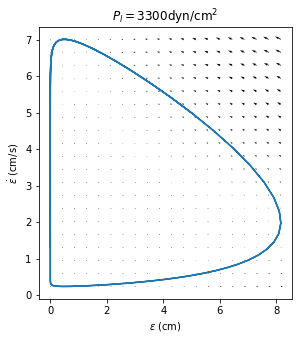

In [17]:

alpha = 1
beta = 0.5
delta = 0.2
gamma = 0.1
x_init = 5
y_init = 5

(time, trace) = run_simulation(alpha, beta, delta, gamma, x_init, y_init)

# Generating spatial derivatives over a range of x and y
# If you're keen convince yourself this code works by consulting the documentation for meshgrid in Numpy
e1_points = np.linspace(np.min(trace[:,0]), np.max(trace[:,0]), 20)
e2_points = np.linspace(np.min(trace[:,1]), np.max(trace[:,1]), 20)

e1_space, e2_space = np.meshgrid(e1_points, e2_points)

de1, de2 = space_derivatives((e1_space, e2_space), alpha, beta, delta, gamma)

fig5 = plt.figure(figsize=[10,5])
ax1 = fig5.add_subplot(1, 2, 1)
ax1.plot(trace[:,0],trace[:,1])
ax1.quiver(e1_space, e2_space, de1, de2, scale_units='xy', angles='xy', scale=1e2)
ax1.set_xlabel(r"$\epsilon$ (cm)")
ax1.set_ylabel(r"$\dot{\epsilon}$ (cm/s)")
ax1.set_title(r"$P_l = 3300$dyn/cm$^2$")

# Freestyling models